# Task 1
Load the data file and explore the data, showing:
- size
- data descriptions
- data distributions with boxplot
- and correlation between columns

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset_path = "data.csv"
df = pd.read_csv(dataset_path)

print(f"the dataset has {df.shape[0]} rows and {df.shape[1]} columns")
df.sample(5)

the dataset has 1000 rows and 11 columns


,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
518,-0.013320,0.046751,-0.006126,0.592550,0.009621,0.009464,-0.018250,0.005427,-0.012593,0.000686,-0.590016
261,-0.028117,-0.029870,0.044905,0.433838,0.795137,-0.007721,-0.008805,0.011604,-0.023171,0.012872,-2.295471
210,0.032552,0.026662,-0.028046,0.121941,0.061327,-0.008486,0.008059,0.007056,-0.002337,-0.020818,-0.076639
506,0.006547,-0.005399,-0.001659,0.118924,0.008100,-0.009379,-0.010713,0.008806,-0.031012,-0.012158,-3.792094
274,-0.000015,-0.000327,-0.009813,0.208286,0.250936,-0.011729,-0.023780,0.038816,0.014803,0.022571,3.835044


In [3]:
df.describe()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000127,0.000297,-0.000421,3.378287e-01,2.521912e-01,0.000364,-0.000191,0.000553,0.000130,0.000524,0.437747
std,0.023475,0.018878,0.019124,2.952473e-01,2.877240e-01,0.017402,0.019349,0.017783,0.018999,0.025391,2.407762
min,-0.074550,-0.055749,-0.063489,9.531015e-07,6.913766e-10,-0.054694,-0.058531,-0.054578,-0.062925,-0.073059,-6.609545
25%,-0.015763,-0.012357,-0.013722,6.778294e-02,1.552023e-02,-0.011251,-0.013393,-0.011797,-0.012001,-0.018202,-1.200759
50%,0.000446,0.000269,-0.000891,2.638645e-01,1.218160e-01,0.000675,-0.000333,0.000422,-0.000858,-0.000219,0.336424
75%,0.015529,0.013924,0.012571,5.712697e-01,4.295876e-01,0.012217,0.012797,0.012697,0.012722,0.018642,2.175038
max,0.079599,0.073114,0.052593,9.996939e-01,9.988956e-01,0.053673,0.051803,0.049480,0.061867,0.081461,7.915506


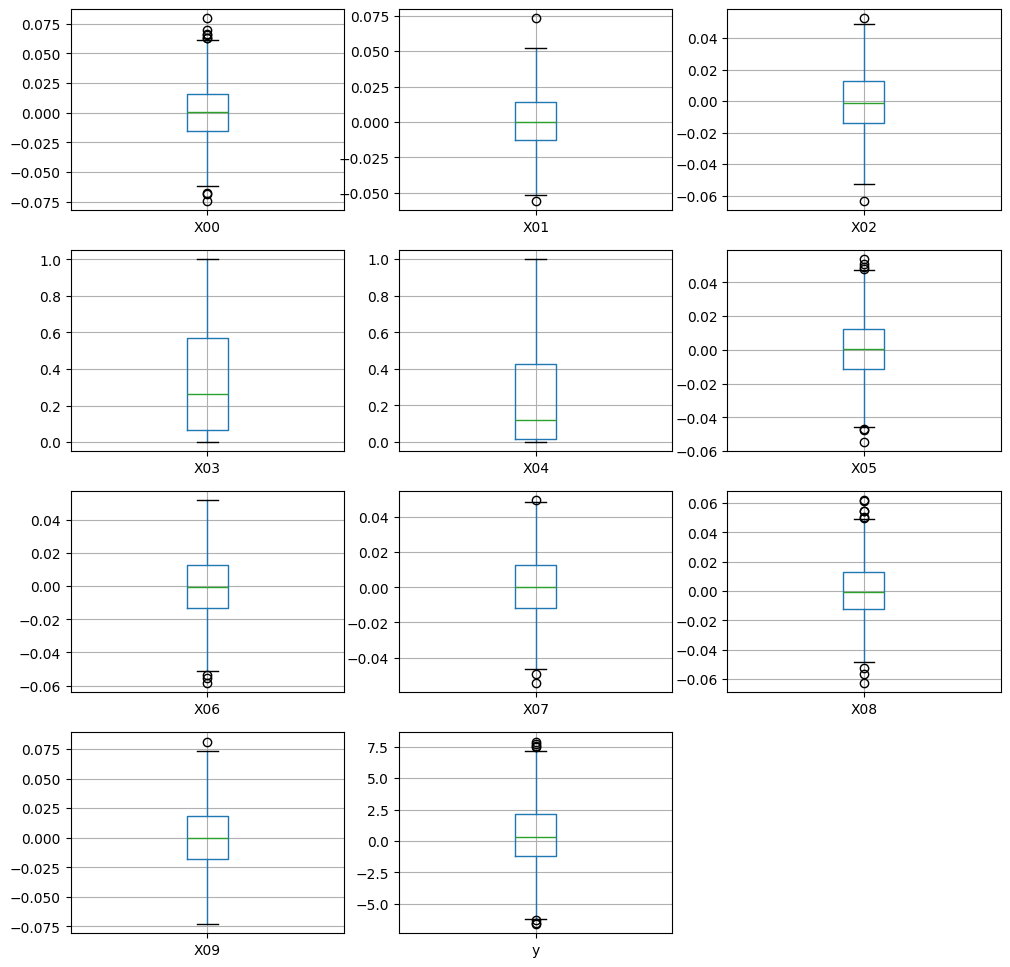

In [4]:
cols = 3
rows = len(df.columns) // cols + 1

plt.figure(figsize=(12,12))

for i, c in enumerate(df.columns, start=1):
    plt.subplot(rows, cols, i)
    df[[c]].boxplot()

<Axes: >

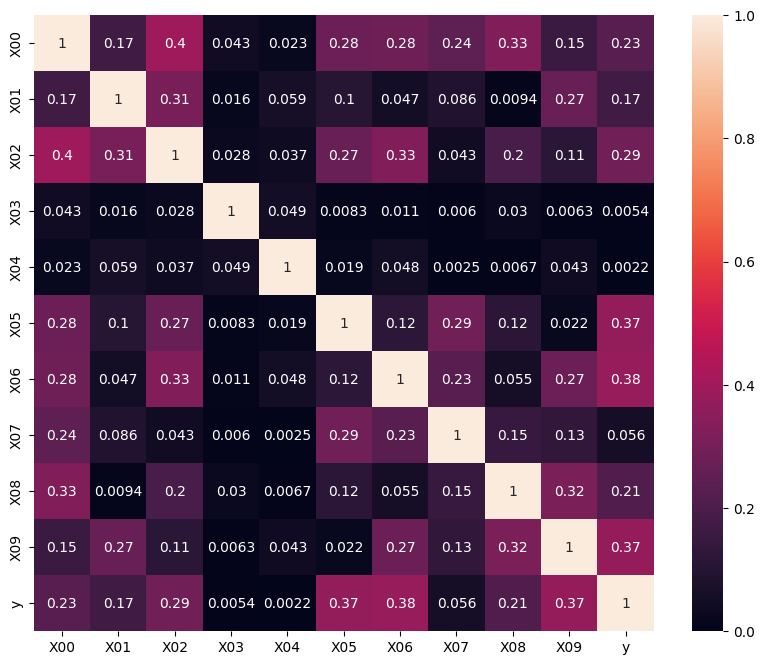

In [5]:
corr = df.corr().abs()
plt.figure(figsize=(10,8))
sns.heatmap(corr, vmin=0, vmax=1, annot=True)

# Task 2
Comment the exploration of step 1 pointing out if there are predicting columns having the absolute value of correlation with the target less than 0.15

looking at the heatmap, we can clearly see that there are such columns; those being: X03, X04 and X07

# Task 3
train and test a multivariate linear regressor and show the Root Mean Squared Error

In [6]:
# we first need to obtain our training and test set

from sklearn.model_selection import train_test_split

target = "y"
X = df.drop(target, axis=1)
y = df[target]

# since the dataset is quite small (only 1000 rows) we need to focus on training set size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(750, 10) (250, 10) (750,) (250,)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

estimator = LinearRegression().fit(X_train, y_train)
y_pred = estimator.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"the RMSE of the default multivariate linear regressor is {rmse}")

the RMSE of the default multivariate linear regressor is 0.9044273459127723


In [13]:
y_pred_train = estimator.predict(X_train)
rmse_train = root_mean_squared_error(y_train, y_pred_train)
print(f"the RMSE of the default multivariate linear regressor after feature selection is {rmse_train}")

the RMSE of the default multivariate linear regressor after feature selection is 0.8588643957888487


# Task 4
train and test a multivariate linear regressor on the reduced dataset obtained dropping the columns loosely correlated with the target, and show the Root Mean Squared Error

In [8]:
drop_list = corr.loc["y", (corr["y"] < 0.15)].index
df2 = df.copy()

print("dataset prima di feature selection")
display(df2.head())
df2 = df2.drop(drop_list, axis=1)
print("dataset dopo feature selection")
display(df2.head())

dataset prima di feature selection


,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,y
0,-0.016771,-0.026036,-0.001474,0.104545,0.352163,0.023372,0.003706,0.004963,-0.007113,0.022166,3.288439
1,-0.011618,0.025699,-0.026818,0.053014,0.613195,-0.012447,0.029382,-0.006348,-0.036920,-0.016464,-2.333510
2,0.027478,0.009282,-0.020700,0.630085,0.612415,-0.004157,0.008240,0.019062,0.010821,-0.012983,2.259783
3,-0.003170,-0.001697,-0.028924,0.389900,0.000182,0.027526,0.012792,-0.021192,-0.011102,0.015352,2.939127
4,-0.039508,-0.009104,0.021215,0.951426,0.778600,0.018246,-0.000294,-0.012900,0.004178,0.014846,1.623948


dataset dopo feature selection


,X00,X01,X02,X05,X06,X08,X09,y
0,-0.016771,-0.026036,-0.001474,0.023372,0.003706,-0.007113,0.022166,3.288439
1,-0.011618,0.025699,-0.026818,-0.012447,0.029382,-0.036920,-0.016464,-2.333510
2,0.027478,0.009282,-0.020700,-0.004157,0.008240,0.010821,-0.012983,2.259783
3,-0.003170,-0.001697,-0.028924,0.027526,0.012792,-0.011102,0.015352,2.939127
4,-0.039508,-0.009104,0.021215,0.018246,-0.000294,0.004178,0.014846,1.623948


In [9]:
X_fs = df2.drop(target, axis=1)
y_fs = df2[target]

# since the dataset is quite small (only 1000 rows) we need to focus on training set size
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y_fs, test_size=0.25)
print(X_train_fs.shape, X_test_fs.shape, y_train_fs.shape, y_test_fs.shape)

(750, 7) (250, 7) (750,) (250,)


In [10]:
estimator = LinearRegression().fit(X_train_fs, y_train_fs)
y_pred_fs = estimator.predict(X_test_fs)
rmse_fs = root_mean_squared_error(y_test_fs, y_pred_fs)
print(f"the RMSE of the default multivariate linear regressor after feature selection is {rmse_fs}")

the RMSE of the default multivariate linear regressor after feature selection is 1.0098787125719693


In [11]:
y_pred_fs_train = estimator.predict(X_train_fs)
rmse_fs_train = root_mean_squared_error(y_train_fs, y_pred_fs_train)
print(f"the RMSE of the default multivariate linear regressor after feature selection is {rmse_fs_train}")

the RMSE of the default multivariate linear regressor after feature selection is 0.9958944336403645


# Task 5
train and test on the reduced dataset a decision tree regressor, and show the Root Mean Squared Error

In [17]:
from sklearn.tree import DecisionTreeRegressor

estimator = DecisionTreeRegressor().fit(X_train_fs, y_train_fs)
y_pred_fs_dt = estimator.predict(X_test_fs)
rmse_fs_dt = root_mean_squared_error(y_test_fs, y_pred_fs_dt)
print(f"the RMSE of the default multivariate decision tree regressor after feature selection is {rmse_fs_dt}")

the RMSE of the default multivariate decision tree regressor after feature selection is 2.0827514620116356


In [18]:
y_pred_fs_train_dt = estimator.predict(X_train_fs)
rmse_fs_train_dt = root_mean_squared_error(y_train_fs, y_pred_fs_train_dt)
print(f"the RMSE of the default multivariate linear regressor after feature selection is {rmse_fs_train_dt}")

the RMSE of the default multivariate linear regressor after feature selection is 0.0


In [20]:
max_depth = estimator.get_depth()
print(f"the depth of the tree is {max_depth}")

the depth of the tree is 19


# Task 6
optimise the depth of the decision tree regressor of step 5 searching for the minimum Root Mean Squared Error with cross-validation, and show the best RMSE

In [21]:
from sklearn.model_selection import ParameterGrid

params = {
    "max_depth": range(2,max_depth+1)
}
list(ParameterGrid(params))

[{'max_depth': 2},
 {'max_depth': 3},
 {'max_depth': 4},
 {'max_depth': 5},
 {'max_depth': 6},
 {'max_depth': 7},
 {'max_depth': 8},
 {'max_depth': 9},
 {'max_depth': 10},
 {'max_depth': 11},
 {'max_depth': 12},
 {'max_depth': 13},
 {'max_depth': 14},
 {'max_depth': 15},
 {'max_depth': 16},
 {'max_depth': 17},
 {'max_depth': 18},
 {'max_depth': 19}]

In [27]:
from sklearn.model_selection import GridSearchCV

scoring = "neg_root_mean_squared_error"
folds = 5

grid = GridSearchCV(
    DecisionTreeRegressor(),
    params,
    scoring=scoring,
    cv=folds
)

grid.fit(X_train_fs, y_train_fs)
y_pred_fs_grid = grid.predict(X_test_fs)

rmse_fs_grid = root_mean_squared_error(y_test_fs, y_pred_fs_grid)
print(f"the RMSE of the optimised multivariate decision tree regressor after feature selection is {rmse_fs_grid}")
print(f"the optimal depth is {grid.best_params_}")

the RMSE of the optimised multivariate decision tree regressor after feature selection is 1.9683664742058518
the optimal depth is {'max_depth': 8}


In [28]:
y_pred_fs_train_dt_opt = grid.predict(X_train_fs)
rmse_fs_train_dt_opt = root_mean_squared_error(y_train_fs, y_pred_fs_train_dt_opt)
print(f"the RMSE of the default multivariate linear regressor after feature selection is {rmse_fs_train_dt_opt}")

the RMSE of the default multivariate linear regressor after feature selection is 0.887071695538685


# Task 7
Comment the results

Abbiamo ottenuto che:

1. con regressione lineare otteniamo più o meno le stesse performance in termini di RMSE con e senza l'eliminazione delle feature scorrelate con il target. Questo suggerisce che le feature eliminate non nascondevano relazioni non lineari con il target e non avevano neanche relazioni particolari con le altre feature del dataset. Per questo motivo eliminare queste feature non ha influenzato l'RMSE, ciò che questa operazione però ha fatto **è stato ridurre l'overfitting e quindi migliorare le capacità di generalizzazione del modello a run-time!**

2. le performance con il decision tree regressor sono nettamente peggiori anche dopo tuning della profondità. Questo suggerisce che le relazione tra i predictor è la target variable sia più simile ad una combinazione lineare rispetto ad una funzione a gradino


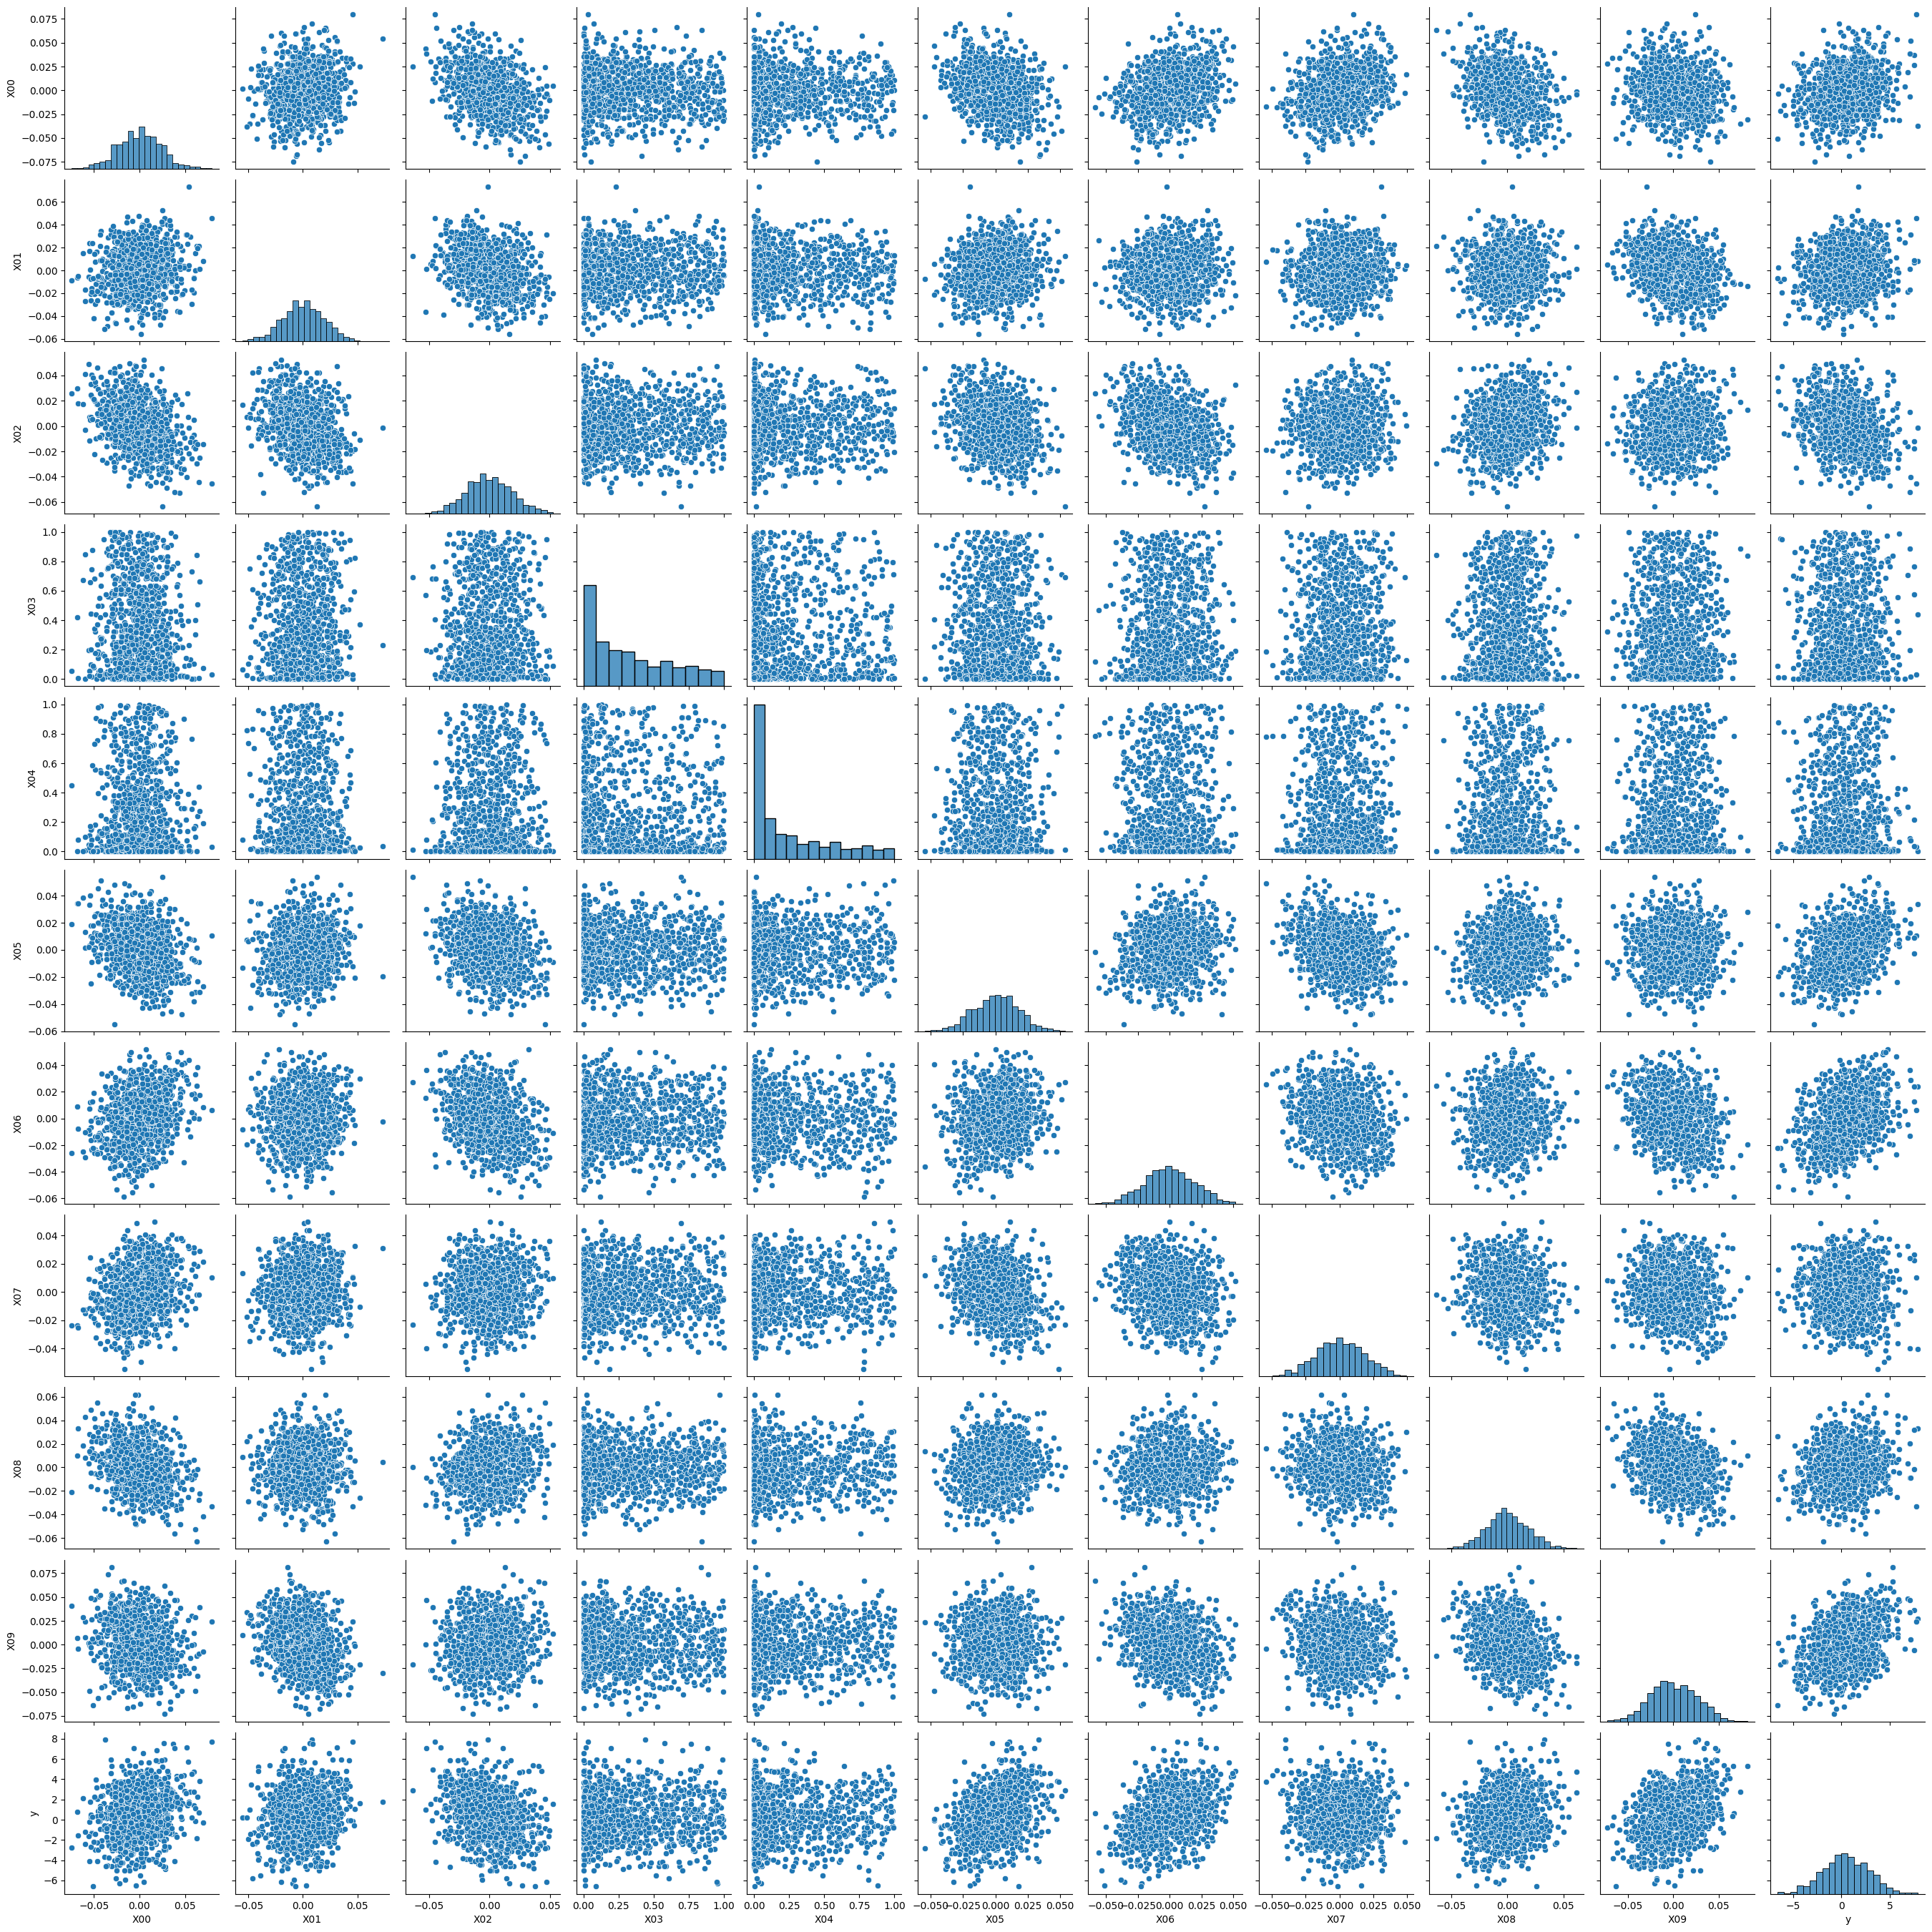

In [51]:
sns.pairplot(df)